In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
total_emails = pd.read_pickle("/Users/nus/twenty-years-of-bldgsim-textmining/processed_data/total_email_data.pkl")

In [5]:
total_emails.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20029 entries, 1999-03-04 08:26:46 to 2018-11-08 18:42:22
Data columns (total 4 columns):
From        20029 non-null object
DateTime    20029 non-null datetime64[ns]
Subject     20029 non-null object
Body        20028 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 782.4+ KB


In [6]:
total_emails.index = total_emails.DateTime

In [7]:
total_emails = total_emails.sort_index()

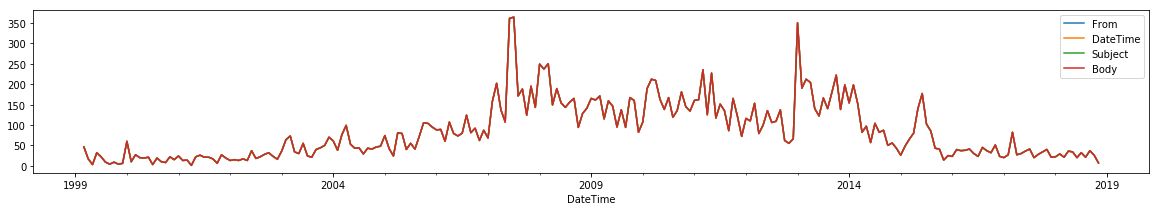

In [8]:
total_emails.resample('M').count().plot(figsize=(20,3))

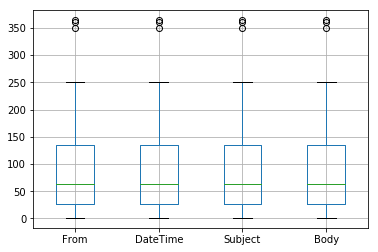

In [9]:
total_emails.resample('M').count().boxplot()

## Topic Groups

In [10]:
topic_groups = pd.read_csv("topic_groups.csv")

In [11]:
topic_groups.head()

,Main Category,Sub-Category,Topic Words
0,Calculation Engines,EnergyPlus,"energyplus, doe, openstudio, workshop, energyp..."
1,Calculation Engines,eQuest/DOE-2,"equest, file, users, doe2, doe, program, model..."
2,Calculation Engines,Trnsys,"trnsys, tess, specialists, thermal, sel, solar..."
3,Calculation Engines,IES,"iesve, software, ies, cfd, thermal, tool, comf..."
4,HVAC System Models,Packaged HVAC,"system, vav, hvac, residential, systems, build..."


In [12]:
topic_groups["Topic Words"][1].split(",")

['equest',
 ' file',
 ' users',
 ' doe2',
 ' doe',
 ' program',
 ' model',
 ' trace',
 ' version',
 ' inp']

In [13]:
topic_groups.iloc[0]

Main Category                                  Calculation Engines
Sub-Category                                            EnergyPlus
Topic Words      energyplus, doe, openstudio, workshop, energyp...
Name: 0, dtype: object

In [14]:
def get_topic_metrics(wordlist, body):
    word_count = 0
    wordlist = wordlist.split(",")
    for word in wordlist:
        try:
            if word in body:
                word_count += 1
            elif str.capitalize(word) in body:
                word_count += 1
        except: 
            print('error')
    return word_count

In [15]:
"University" in total_emails.Body[1]

True

In [16]:
total_emails.Body.apply(lambda x: get_topic_metrics(topic_groups["Topic Words"][1], x))

error
error
error
error
error
error
error
error
error
error


DateTime
1999-03-04 08:26:46    0
1999-03-04 08:43:59    1
1999-03-04 09:28:21    2
1999-03-04 09:39:38    2
1999-03-04 09:57:42    1
1999-03-04 10:09:20    1
1999-03-04 11:24:11    0
1999-03-04 11:25:56    0
1999-03-04 11:36:06    1
1999-03-04 12:46:26    0
1999-03-04 13:04:21    0
1999-03-04 13:12:37    1
1999-03-04 13:52:00    0
1999-03-04 14:54:19    1
1999-03-04 15:19:20    0
1999-03-04 16:09:24    2
1999-03-04 16:44:13    2
1999-03-05 18:28:58    1
1999-03-09 10:46:38    2
1999-03-09 17:51:53    3
1999-03-10 09:46:58    1
1999-03-10 18:43:11    0
1999-03-10 23:26:22    0
1999-03-11 08:17:01    0
1999-03-11 08:41:05    1
1999-03-11 08:51:04    0
1999-03-11 08:59:21    0
1999-03-11 11:20:53    0
1999-03-11 11:27:46    1
1999-03-11 11:35:41    0
                      ..
2018-10-04 17:57:33    1
2018-10-04 19:10:15    1
2018-10-04 23:33:49    0
2018-10-08 15:55:30    3
2018-10-09 12:34:22    1
2018-10-10 14:55:47    2
2018-10-10 16:51:40    1
2018-10-12 16:22:20    0
2018-10-13 14:09

## Loop through each topic

In [17]:
for i in range(len(topic_groups)):
    print(topic_groups.iloc[i]["Sub-Category"])
    total_emails[topic_groups.iloc[i]["Sub-Category"]] = total_emails.Body.apply(lambda x: get_topic_metrics(topic_groups["Topic Words"][i], x))

EnergyPlus
error
error
error
error
error
error
error
error
error
error
eQuest/DOE-2
error
error
error
error
error
error
error
error
error
error
Trnsys
error
error
error
error
error
error
error
error
error
error
IES
error
error
error
error
error
error
error
error
error
error
Packaged HVAC
error
error
error
error
error
error
error
error
error
error
Waterside Loop
error
error
error
error
error
error
error
error
error
error
Airside Systems
error
error
error
error
error
error
error
error
error
error
Radiant Systems
error
error
error
error
error
error
error
error
error
error
Chilled Water Plants
error
error
error
error
error
error
error
error
error
error
Energy Recovery
error
error
error
error
error
error
error
error
error
error
Envelope Models
error
error
error
error
error
error
error
error
error
error
Glazing Models
error
error
error
error
error
error
error
error
error
error
Existing Buildings
error
error
error
error
error
error
error
error
error
error
List Admin
error
error
error
error
er

In [18]:
total_emails.resample("M").sum().sum(axis=1)

DateTime
1999-03-31     660
1999-04-30     262
1999-05-31      16
1999-06-30     635
1999-07-31     326
1999-08-31     125
1999-09-30      38
1999-10-31      78
1999-11-30      18
1999-12-31      46
2000-01-31    1574
2000-02-29      85
2000-03-31     342
2000-04-30     372
2000-05-31     280
2000-06-30     288
2000-07-31      50
2000-08-31     195
2000-09-30     103
2000-10-31      95
2000-11-30     248
2000-12-31     179
2001-01-31     443
2001-02-28     147
2001-03-31     123
2001-04-30       0
2001-05-31     328
2001-06-30     550
2001-07-31     179
2001-08-31     381
              ... 
2016-06-30     518
2016-07-31     582
2016-08-31    1067
2016-09-30     766
2016-10-31     718
2016-11-30    1091
2016-12-31     546
2017-01-31     437
2017-02-28     669
2017-03-31    1041
2017-04-30     625
2017-05-31     465
2017-06-30     766
2017-07-31     648
2017-08-31     490
2017-09-30     497
2017-10-31     881
2017-11-30     854
2017-12-31     398
2018-01-31     636
2018-02-28     617
201

In [19]:
total_emails.resample("M").sum().sum(axis=1)

DateTime
1999-03-31     660
1999-04-30     262
1999-05-31      16
1999-06-30     635
1999-07-31     326
1999-08-31     125
1999-09-30      38
1999-10-31      78
1999-11-30      18
1999-12-31      46
2000-01-31    1574
2000-02-29      85
2000-03-31     342
2000-04-30     372
2000-05-31     280
2000-06-30     288
2000-07-31      50
2000-08-31     195
2000-09-30     103
2000-10-31      95
2000-11-30     248
2000-12-31     179
2001-01-31     443
2001-02-28     147
2001-03-31     123
2001-04-30       0
2001-05-31     328
2001-06-30     550
2001-07-31     179
2001-08-31     381
              ... 
2016-06-30     518
2016-07-31     582
2016-08-31    1067
2016-09-30     766
2016-10-31     718
2016-11-30    1091
2016-12-31     546
2017-01-31     437
2017-02-28     669
2017-03-31    1041
2017-04-30     625
2017-05-31     465
2017-06-30     766
2017-07-31     648
2017-08-31     490
2017-09-30     497
2017-10-31     881
2017-11-30     854
2017-12-31     398
2018-01-31     636
2018-02-28     617
201

In [20]:
total_emails

,From,DateTime,Subject,Body,EnergyPlus,eQuest/DOE-2,Trnsys,IES,Packaged HVAC,Waterside Loop,...,Consulting and Cost,Job Posting,Simulation Conferences,Weather Files,Load Calculations,LEED Appendix G Calc,Unmet Hours,Energy Savings,Yahoo EnergyPlus Group,Workshops and Training
DateTime,,,,,,,,,,,,,,,,,,,,,
1999-03-04 08:26:46,jglazer at gard.com (Jason Glazer)\n,1999-03-04 08:26:46,d Experience\n,\n,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1999-03-04 08:43:59,bradley at sel.me.wisc.edu (David Bradley)\n,1999-03-04 08:43:59,iences\n,From: bradley at sel.me.wisc.edu (David Bradle...,1,1,1,1,0,0,...,0,1,1,0,0,0,0,1,0,0
1999-03-04 09:28:21,"RBSPURLO at southernco.com (Spurlock, R. Bruc...",1999-03-04 09:28:21,imulation Experience\n,"From: RBSPURLO at southernco.com (Spurlock, R....",1,2,1,0,1,0,...,0,0,2,0,0,0,1,3,0,0
1999-03-04 09:39:38,kelsey at kw-energy.com (Jim Kelsey)\n,1999-03-04 09:39:38,imulation Experience\n,From: kelsey at kw-energy.com (Jim Kelsey)\n D...,0,2,2,1,2,3,...,4,2,3,1,1,0,2,8,1,0
1999-03-04 09:57:42,rdavis at oarsman.com (Randy Davis)\n,1999-03-04 09:57:42,d Experience\n,From: rdavis at oarsman.com (Randy Davis)\n Da...,2,1,2,1,0,0,...,1,1,0,0,0,0,0,1,0,0
1999-03-04 10:09:20,"bseaton at ASHRAE.org (Seaton, Bill)\n",1999-03-04 10:09:20,ch Projects Ready To Bid.\n,"From: bseaton at ASHRAE.org (Seaton, Bill)\n D...",1,1,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
1999-03-04 11:24:11,Todd.Taylor at pnl.gov (Z. Todd Taylor)\n,1999-03-04 11:24:11,there?\n,From: Todd.Taylor at pnl.gov (Z. Todd Taylor)\...,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1999-03-04 11:25:56,Robert.Sonderegger at SRC-Systems.com (Robert...,1999-03-04 11:25:56,there?\n,From: Robert.Sonderegger at SRC-Systems.com (R...,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1999-03-04 11:36:06,Robert.Sonderegger at SRC-Systems.com (Robert...,1999-03-04 11:36:06,site\n,From: Robert.Sonderegger at SRC-Systems.com (R...,1,1,1,2,3,0,...,2,1,3,0,1,0,0,6,0,1


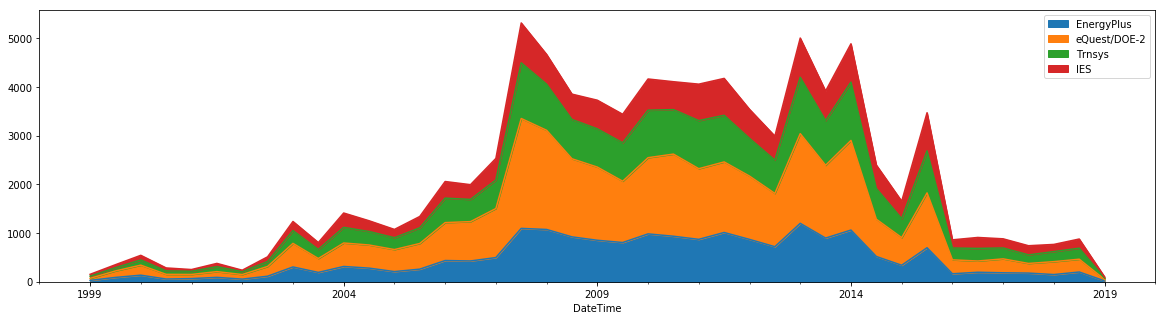

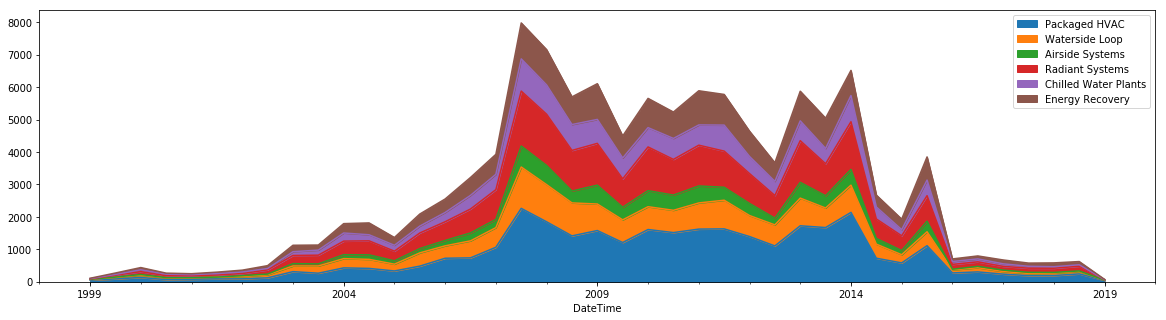

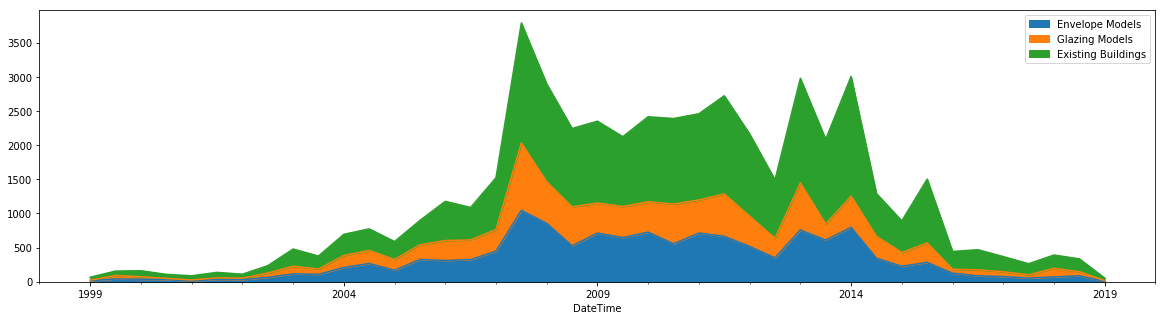

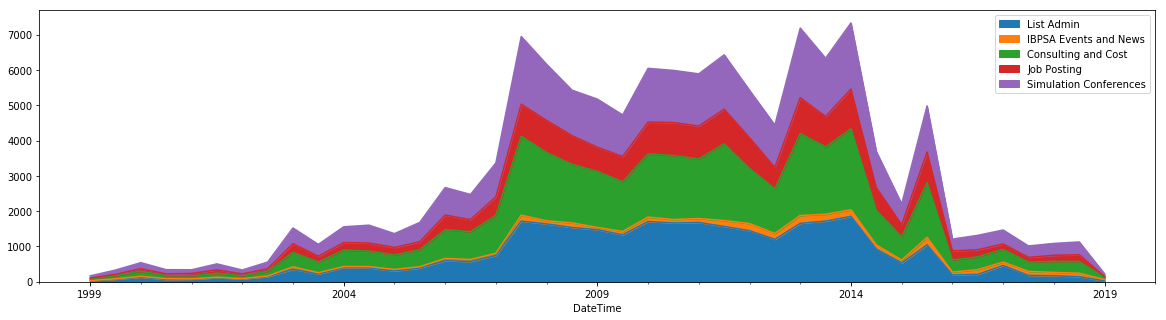

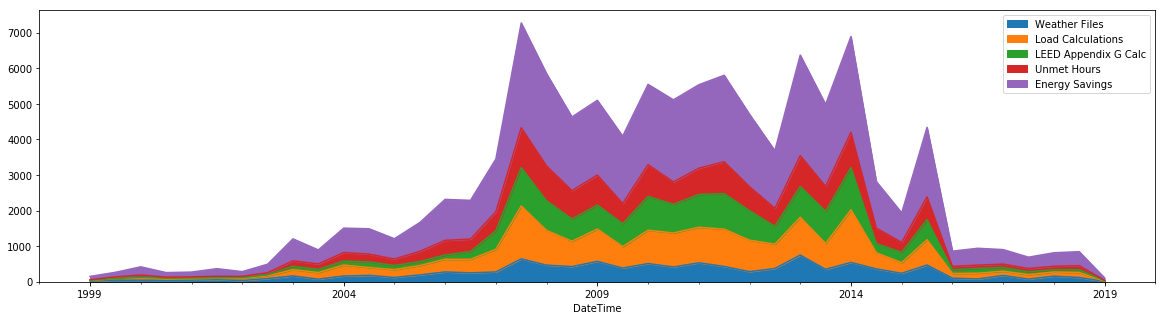

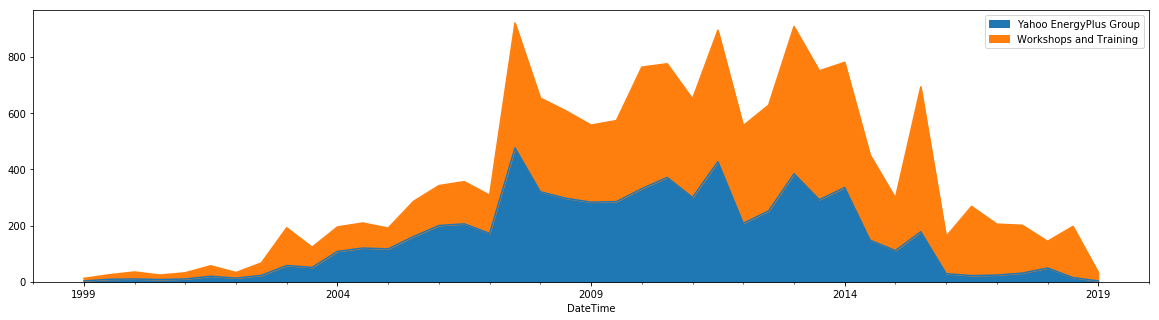

In [21]:
for main_cat in topic_groups["Main Category"].unique():
    sub_cats = list(topic_groups[topic_groups["Main Category"] == main_cat]["Sub-Category"])
    total_emails[sub_cats].resample("2Q").sum().plot.area(figsize=(20,5))
    plt.show()

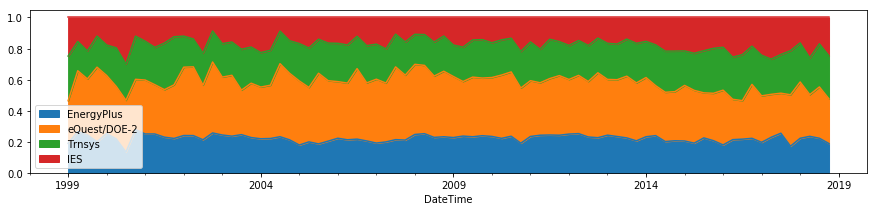

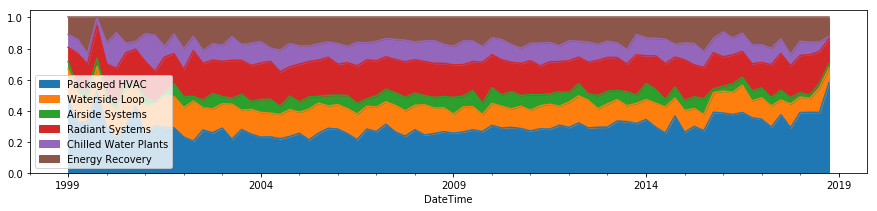

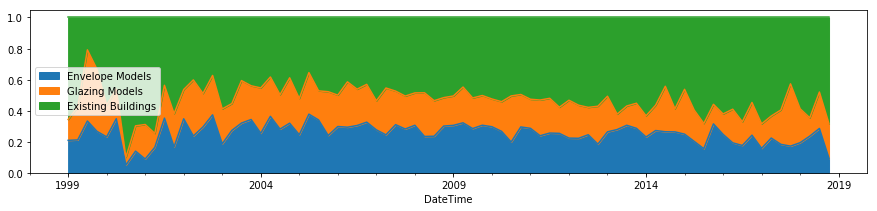

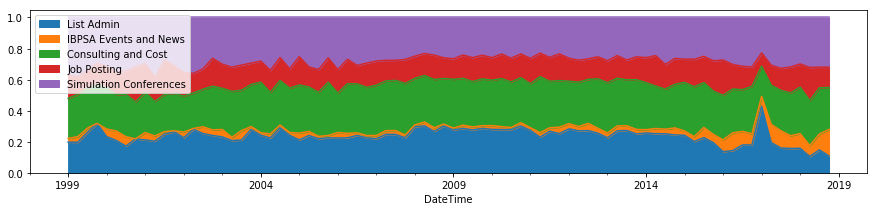

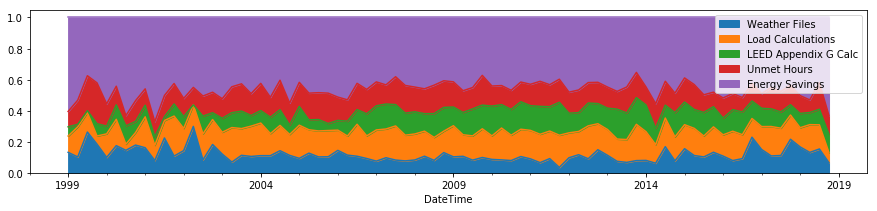

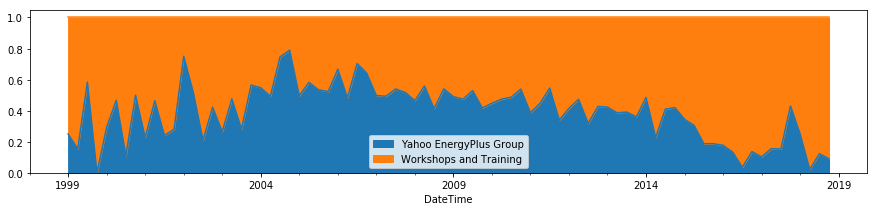

In [22]:
for main_cat in topic_groups["Main Category"].unique():
    sub_cats = list(topic_groups[topic_groups["Main Category"] == main_cat]["Sub-Category"])
    total_emails[sub_cats].resample("Q").sum().divide(total_emails[sub_cats].resample("Q").sum().sum(axis=1), axis=0).plot.area(figsize=(15,3))
    plt.show()

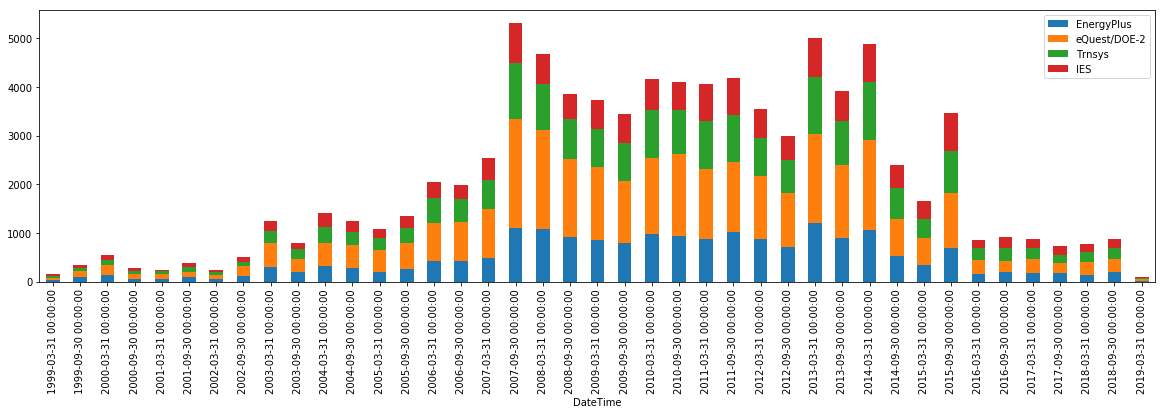

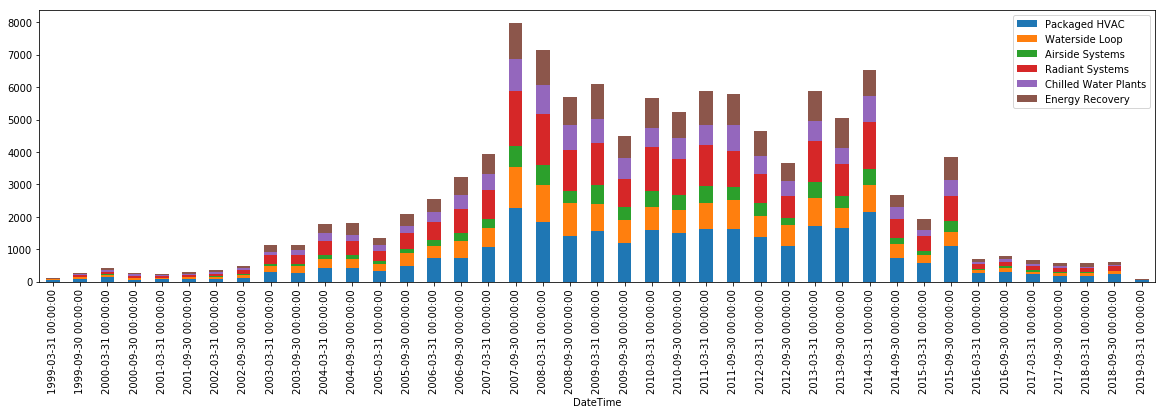

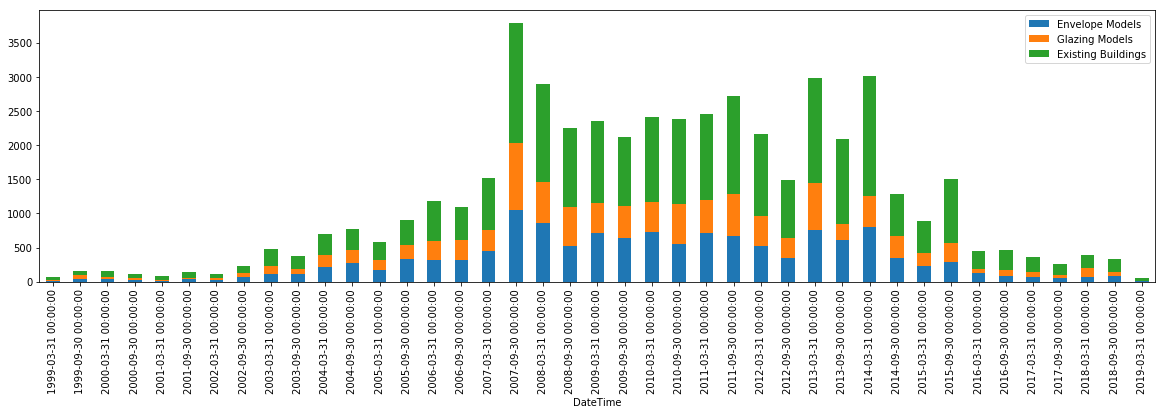

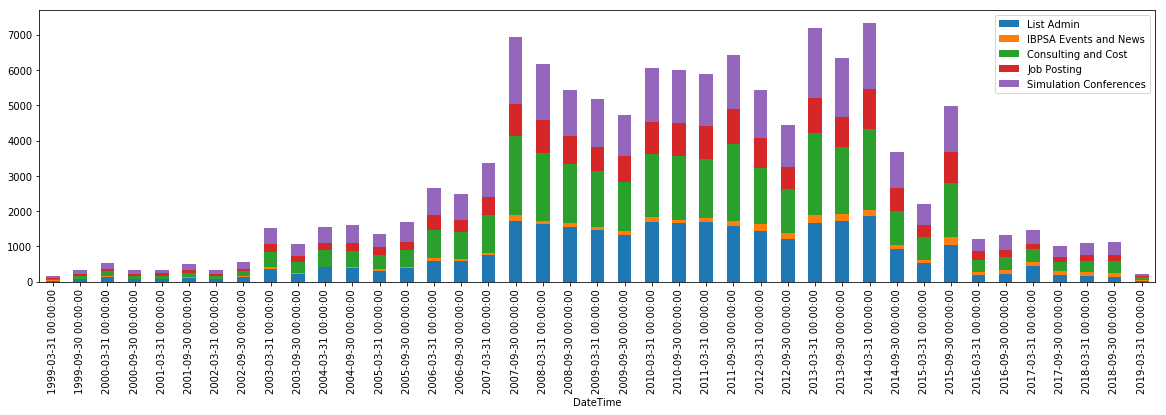

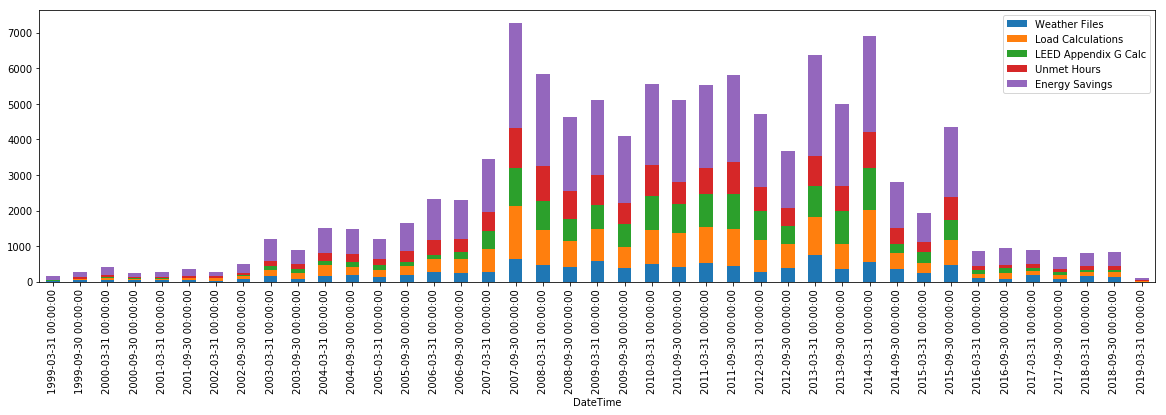

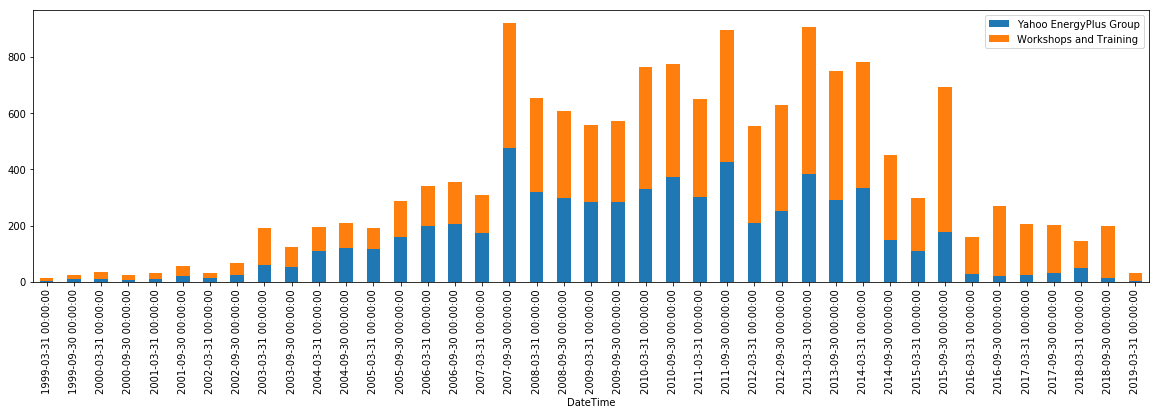

In [23]:
for main_cat in topic_groups["Main Category"].unique():
    sub_cats = list(topic_groups[topic_groups["Main Category"] == main_cat]["Sub-Category"])
    total_emails[sub_cats].resample("2Q").sum().plot(figsize=(20,5),kind='bar', stacked=True)
    plt.show()

In [24]:
total_emails_normalized = total_emails.resample("M").sum().div(total_emails.resample("M").sum().sum(axis=1), axis=0)


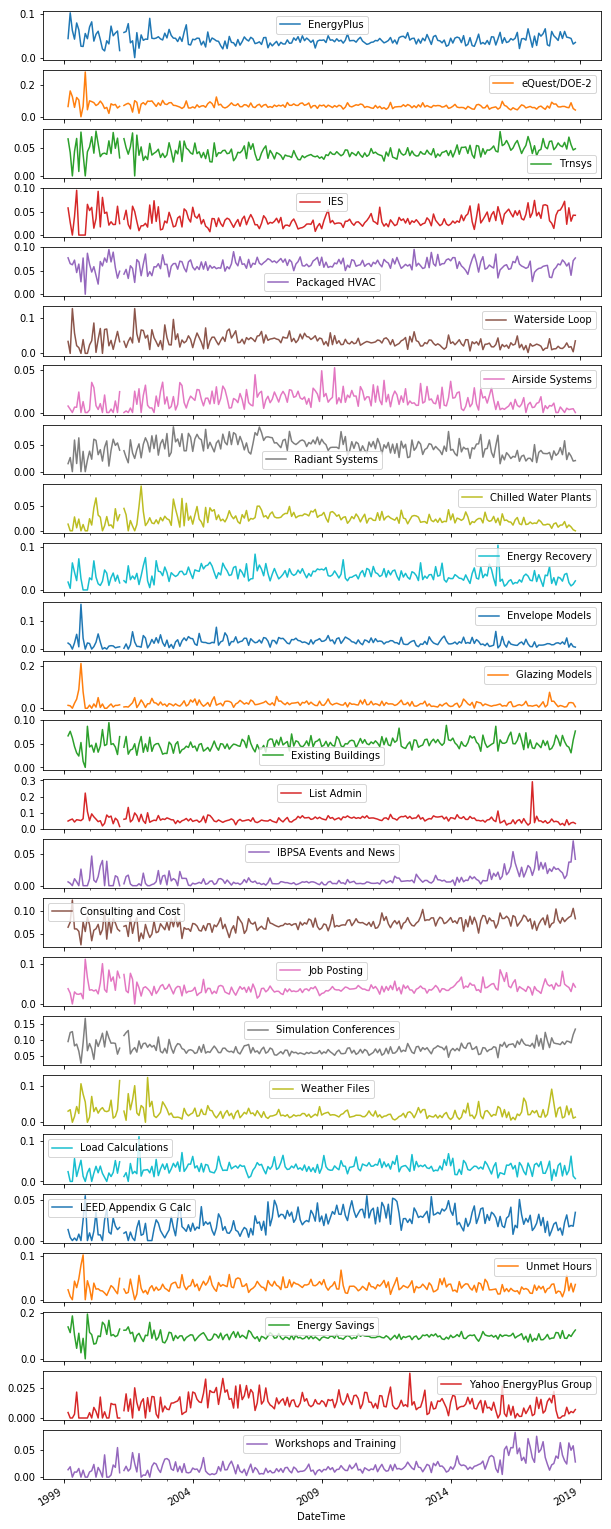

In [25]:
total_emails_normalized.plot(subplots=True, figsize=(10,30));

In [26]:
#total_emails.resample("M").sum().sum(axis=1)

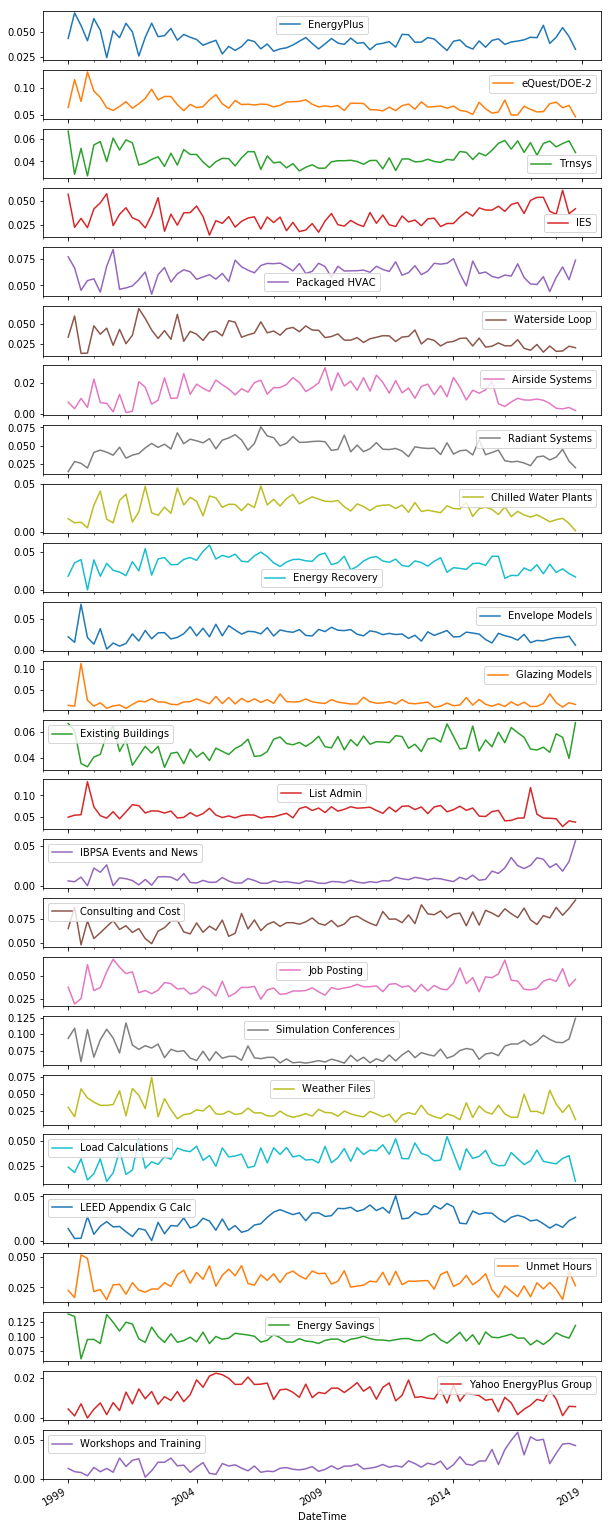

In [27]:
total_emails_normalized.resample("Q").mean().plot(subplots=True, figsize=(10,30));

In [28]:
list(total_emails.columns)

['From',
 'DateTime',
 'Subject',
 'Body',
 'EnergyPlus',
 'eQuest/DOE-2',
 'Trnsys',
 'IES',
 'Packaged HVAC',
 'Waterside Loop',
 'Airside Systems',
 'Radiant Systems',
 'Chilled Water Plants',
 'Energy Recovery',
 'Envelope Models',
 'Glazing Models',
 'Existing Buildings',
 'List Admin',
 'IBPSA Events and News',
 'Consulting and Cost',
 'Job Posting',
 'Simulation Conferences',
 'Weather Files',
 'Load Calculations',
 'LEED Appendix G Calc',
 'Unmet Hours',
 'Energy Savings',
 'Yahoo EnergyPlus Group',
 'Workshops and Training']

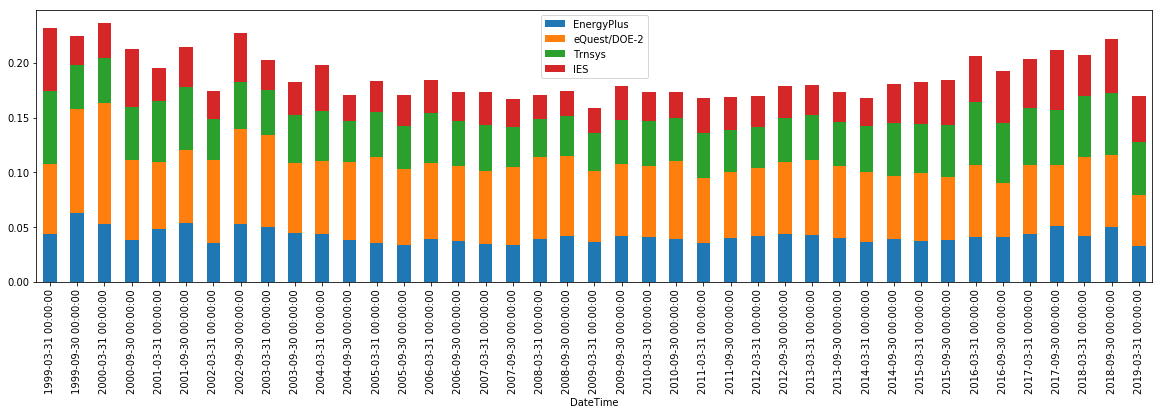

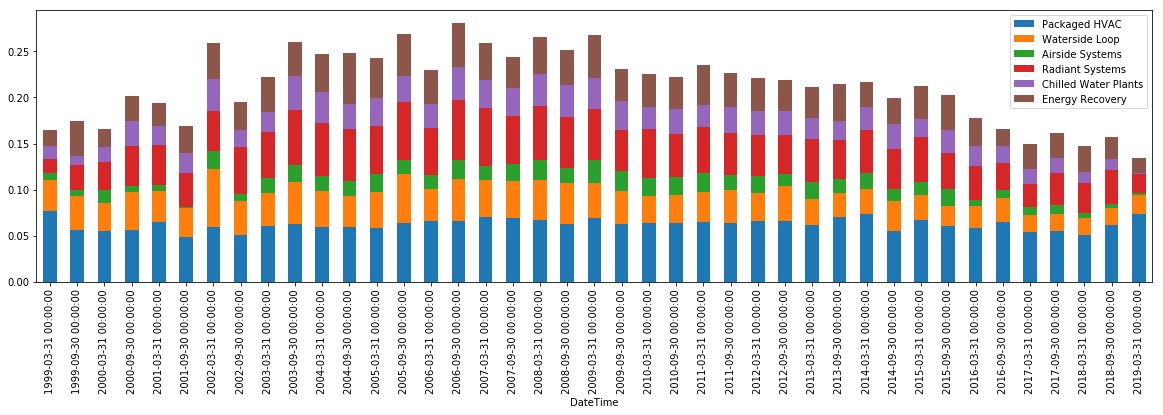

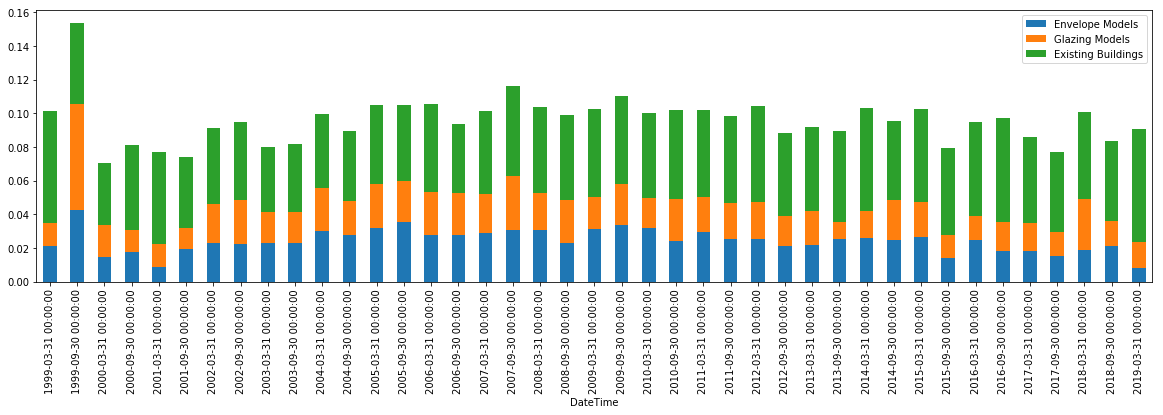

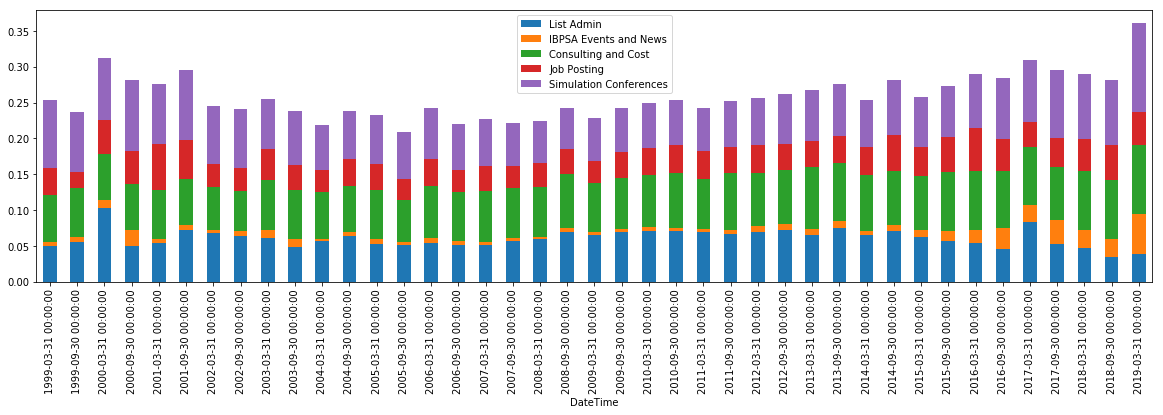

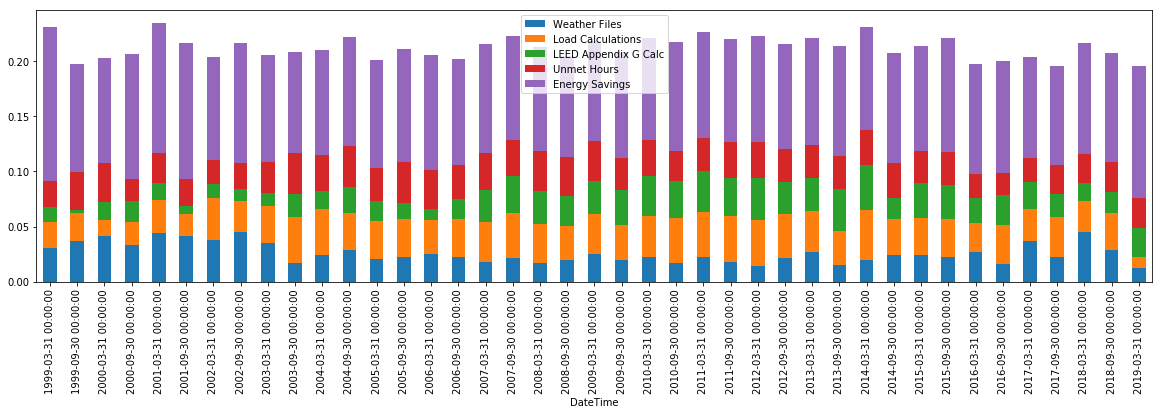

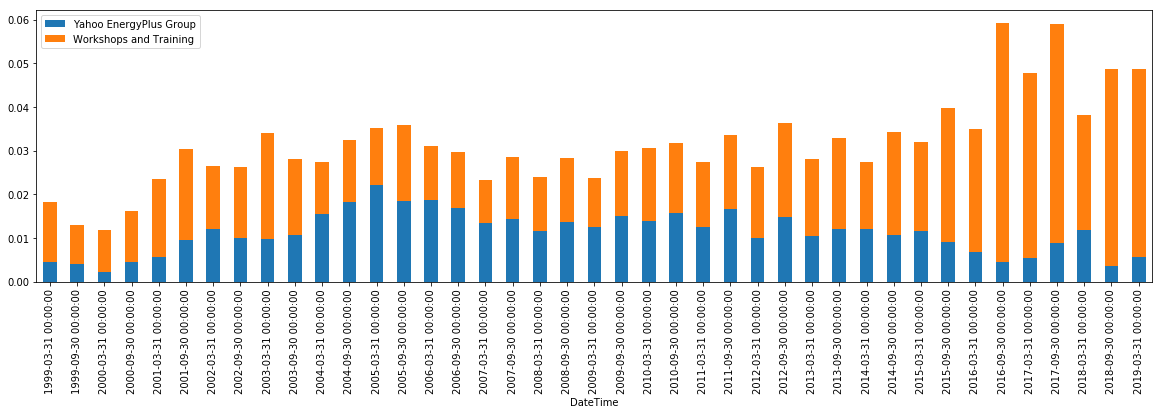

In [29]:
for main_cat in topic_groups["Main Category"].unique():
    sub_cats = list(topic_groups[topic_groups["Main Category"] == main_cat]["Sub-Category"])
    total_emails_normalized[sub_cats].resample("2Q").mean().plot(figsize=(20,5),kind='bar', stacked=True)
    plt.show()